In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import dynalearn
from matplotlib.lines import Line2D
from dynalearn.utilities import to_nary
from dynalearn.experiments import Experiment
from dynalearn.experiments.metrics import LTPMetrics


In [9]:
tau = 0.02
gamma = 0.12
zeta = 10.
ws = 2
wt = 1

true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
              dynalearn.utilities.color_dark["grey"]]
markers = ["o", "^"]
transitions = ["0-1", "1-0"]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data = h5py.File(f"../data/phase2-data/training/summary/hiddensissis-ba-ns1000-ws{ws}-wt{wt}.h5", "r")
for i, t in enumerate(transitions):
    d = data[f"TrueLTPSummary/all/{t}"][...]
    x, y, yl, yh = d[:,0], d[:,1], d[:,2], d[:,3]
    ax[0].plot(x, y, color=true_colors[i], linestyle='-', lw=3)
    ax[0].fill_between(x, yl, yh, color=true_colors[i], alpha=0.3)
#     ax[1].plot(x, y, color=true_colors[i], linestyle='-', lw=3)
#     ax[1].fill_between(x, yl, yh, color=true_colors[i], alpha=0.3)
    
    d = data[f"GNNLTPSummary/all/{t}"][...]
    x, y, yl, yh = d[:,0], d[:,1], d[:,2], d[:,3]
    ax[0].plot(x, y, color=gnn_colors[i], linestyle='--', lw=3)
    ax[0].fill_between(x, yl, yh, color=gnn_colors[i], alpha=0.3)
#     if i == 0:
#         y = 1 - (1 - zeta / 2. * tau)**x
#     else:
#         y = gamma*np.ones(x.shape)
#     ax[1].plot(x, y, linestyle='--', lw=3, color=gnn_colors[i])
    
    y = 1 - (1 - tau)**x
    ax[0].plot(x, y, linestyle='dotted', lw=3, color=gnn_colors[0])
#     ax[1].plot(x, y, linestyle='dotted', lw=3, color=gnn_colors[0])

#     d = data[f"MLELTPSummary/all/{t}"][...]
#     x, y, yl, yh = d[:,0], d[:,1], d[:,2], d[:,3]
#     err = np.zeros((2, yl.shape[0]))
#     err[0] = (y - yl)
#     err[1] = (yh - y)
#     plt.errorbar(x, y, yerr=err, marker=markers[i], color=gnn_colors[i],
#                  markeredgewidth=1, markeredgecolor="k", alpha=0.3)

ax[0].set_xlabel(r'Observed number of infected neighbors', fontsize=14)
# ax[1].set_xlabel(r'Observed number of infected neighbors', fontsize=14)
ax[0].set_ylabel(r'Transition probability', fontsize=14)

ax[0].set_xlim([0, np.max(x)])
# ax[1].set_xlim([0, np.max(x)])
ax[0].set_title(r"GNN", fontsize=16)
# ax[1].set_title(r"Effective SIS ($\eta = 1.2$)", fontsize=16)


# handles = []
# handles.append(Line2D([0], [0], marker="None", linestyle='-', color=gnn_colors[0], lw=5, 
#                       label=r'Infection $(S\to I)$'))
# handles.append(Line2D([0], [0], marker="None", linestyle='-', color=gnn_colors[1], lw=5, 
#                       label=r'Recovery $(I\to S)$'))
# handles.append(Line2D([0], [0], marker="None", linestyle='-', color=true_colors[2], lw=2, 
#                       label=r'Interacting'))
# handles.append(Line2D([0], [0], marker="None", linestyle='dotted', color=gnn_colors[2], lw=2, 
#                       label=r'Simple'))
# # handles.append(Line2D([0], [0], marker="None", linestyle='dashdot', color=gnn_colors[2], lw=2, 
# #                       label=r'Effective simple'))
# handles.append(Line2D([0], [0], marker="None", linestyle='--', color=gnn_colors[2], lw=2, 
#                       label=r'GNN'))
# ax[0].legend(handles=handles, loc=0, fontsize=12)

handles = []
handles.append(Line2D([0], [0], marker="None", linestyle='-', color=gnn_colors[0], lw=5, 
                      label=r'Infection $(S\to I)$'))
handles.append(Line2D([0], [0], marker="None", linestyle='-', color=gnn_colors[1], lw=5, 
                      label=r'Recovery $(I\to S)$'))
handles.append(Line2D([0], [0], marker="None", linestyle='-', color=true_colors[2], lw=2, 
                      label=r'Interacting'))
handles.append(Line2D([0], [0], marker="None", linestyle='dotted', color=gnn_colors[2], lw=2, 
                      label=r'Simple'))
# handles.append(Line2D([0], [0], marker="None", linestyle='dashdot', color=gnn_colors[2], lw=2, 
#                       label=r'Effective simple'))
handles.append(Line2D([0], [0], marker="None", linestyle='--', color=gnn_colors[2], lw=2, 
                      label=r'Effective GNN'))
ax[0].legend(handles=handles, loc=0, fontsize=12)

x = data["TruePEMFSummary/parameters"][...]
y = data["TruePEMFSummary/absorbing_fixed_point"][...][:, 1] + data["TruePEMFSummary/absorbing_fixed_point"][...][:, 3]
ax[1].plot(x, y, color=true_colors[0], lw=3)
y = data["TruePEMFSummary/epidemic_fixed_point"][...][:, 1] + data["TruePEMFSummary/epidemic_fixed_point"][...][:, 3]
ax[1].plot(x, y, color=true_colors[0], lw=3)

cond = to_nary(np.arange(2**ws), base=2, dim=ws)[-1] == 1
y = data["GNNPEMFSummary/absorbing_fixed_point"][...][:, cond].sum(-1)
ax[1].plot(x, y, ls='--', color=gnn_colors[0], lw=3)
y = data["GNNPEMFSummary/epidemic_fixed_point"][...][:, cond].sum(-1)
ax[1].plot(x, y, ls='--', color=gnn_colors[0], lw=3)

handles = []
handles.append(Line2D([0], [0], marker="None", linestyle='-', color=true_colors[0], lw=2, 
                      label=r'Interacting'))
handles.append(Line2D([0], [0], marker="None", linestyle='--', color=gnn_colors[0], lw=2, 
                      label=r'Effective GNN'))
ax[1].legend(handles=handles, loc=0, fontsize=12)
ax[1].set_xlabel(r"Average degree $\langle k \rangle$", fontsize=14)
ax[1].set_ylabel(r"Prevalence", fontsize=14)

# y = 1 - (1 - tau)**x
# plt.plot(x, y, linestyle='dotted', lw=3, color=gnn_colors[0])

# y = gamma*np.ones(x.shape)
# plt.plot(x, y, linestyle='dotted', lw=3, color=gnn_colors[1])

# y = 1 - (1 - 5 * tau)**x
# plt.plot(x, y, linestyle='dashdot', lw=3, color=gnn_colors[0])

# y = gamma*np.ones(x.shape)
# plt.plot(x, y, linestyle='dashdot', lw=3, color=gnn_colors[1])

# plt.savefig('./hidden_interacting-strong.png')
data.close()

NameError: name 'dynalearn' is not defined

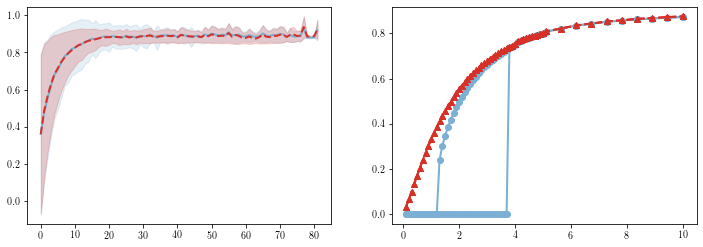

In [64]:
ws, wt = 2, 1

experiment = Experiment.from_file(f"../data/phase2-data/training/full_data/hiddensissis-ba-ns1000-"+
                                  f"ws{ws}-wt{wt}/config.pickle")
experiment.load()



true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
              dynalearn.utilities.color_dark["grey"]]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

s_cond = np.where(to_nary(np.arange(2**ws), base=2, dim=ws)[-1] == 0)[0].tolist()
i_cond = np.where(to_nary(np.arange(2**ws), base=2, dim=ws)[-1] == 1)[0].tolist()

ltp = experiment.metrics["TrueLTPMetrics"].data["ltp"]
s = experiment.metrics["TrueLTPMetrics"].data["summaries"]
x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=1, axis=i_cond)
ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)
ax[0].fill_between(x, yl, yh, color=true_colors[0], alpha=0.2)

ltp = experiment.metrics["GNNLTPMetrics"].data["ltp"]
s = experiment.metrics["GNNLTPMetrics"].data["summaries"]
x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=1, axis=i_cond)
ax[0].plot(x, y, color=gnn_colors[1], ls='--', lw=2)
ax[0].fill_between(x, yl, yh, color=gnn_colors[1], alpha=0.2)

x = experiment.metrics["TruePEMFMetrics"].data["parameters"]
y1 = experiment.metrics["TruePEMFMetrics"].data["absorbing_fixed_point"]
y2 = experiment.metrics["TruePEMFMetrics"].data["epidemic_fixed_point"]
y1 = y1[:, (1, 3)].sum(-1)
y2 = y2[:, (1, 3)].sum(-1)

ax[1].plot(x, y1, color=true_colors[0], ls='-', lw=2, marker='o')
ax[1].plot(x, y2, color=true_colors[0], ls='-', lw=2, marker='o')


x = experiment.metrics["GNNPEMFMetrics"].data["parameters"]
y1 = experiment.metrics["GNNPEMFMetrics"].data["absorbing_fixed_point"]
y2 = experiment.metrics["GNNPEMFMetrics"].data["epidemic_fixed_point"]

y1 = y1[:, i_cond].sum(-1)
y2 = y2[:, i_cond].sum(-1)
ax[1].plot(x, y1, color=gnn_colors[1], ls='--', lw=2, marker='^')
ax[1].plot(x, y2, color=gnn_colors[1], ls='--', lw=2, marker='^')
# ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)

# ltp = experiment.metrics["GNNLTPMetrics"].data["ltp"]
# s = experiment.metrics["GNNLTPMetrics"].data["summaries"]
# # x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=[0,2], out_state=1, axis=[1, 3])
# x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=0, out_state=1, axis=1)
# ax[0].plot(x, y, color=gnn_colors[0], ls='--', lw=2)
# ax[0].fill_between(x, yl, yh, color=gnn_colors[0], alpha=0.2)


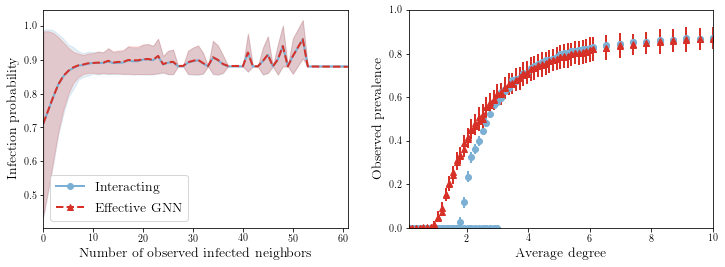

In [13]:
ws, wt = 5, 1
# dynamics = "sissis"
dynamics = "hiddensissis"
experiment = Experiment.unzip(f"../data/phase2-data/training/summary/{dynamics}-ba-ns10000-ws{ws}-wt{wt}.zip")
experiment.load_metrics()

_ws = ws if ws <= 3 else 3

true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
              dynalearn.utilities.color_dark["grey"]]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

if dynamics == "sissis":
    s_cond = [0, 2]
    i_cond = [1, 3]
elif dynamics == "hiddensissis":
    s_cond = np.where(to_nary(np.arange(2**_ws), base=2, dim=ws)[-1] == 0)[0].tolist()
    i_cond = np.where(to_nary(np.arange(2**_ws), base=2, dim=ws)[-1] == 1)[0].tolist()

ltp = experiment.metrics["TrueLTPMetrics"].data["ltp"]
s = experiment.metrics["TrueLTPMetrics"].data["summaries"]
if dynamics == "sissis":
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=[1, 3], axis=i_cond)
elif dynamics == "hiddensissis":
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=1, axis=i_cond)
ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)
ax[0].fill_between(x, yl, yh, color=true_colors[0], alpha=0.2)
xmin, xmax = np.min(x), np.max(x)

ltp = experiment.metrics["GNNLTPMetrics"].data["ltp"]
s = experiment.metrics["GNNLTPMetrics"].data["summaries"]
if dynamics == "sissis":
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=[1, 3], axis=i_cond)
elif dynamics == "hiddensissis":
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=1, axis=i_cond)
ax[0].plot(x, y, color=gnn_colors[1], ls='--', lw=2)
ax[0].fill_between(x, yl, yh, color=gnn_colors[1], alpha=0.2)
xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
ax[0].set_xlim([xmin, xmax])
# ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Number of observed infected neighbors', fontsize=14)
ax[0].set_ylabel('Infection probability', fontsize=14)

x = experiment.metrics["TruePESSMetrics"].data["parameters"]
data1 = experiment.metrics["TruePESSMetrics"].data["absorbing_stationary_state"]
data2 = experiment.metrics["TruePESSMetrics"].data["epidemic_stationary_state"]
y1 = data1[:, 0, (1, 3)].sum(-1)
y2 = data2[:, 0, (1, 3)].sum(-1)
err1 = data1[:, 1, (1, 3)].sum(-1)
err2 = data2[:, 1, (1, 3)].sum(-1)

ax[1].errorbar(x, y1, yerr=err1, color=true_colors[0], ls='None', lw=2, marker='o')
ax[1].errorbar(x, y2, yerr=err2, color=true_colors[0], ls='None', lw=2, marker='o')
xmin, xmax = np.min(x), np.max(x)

if dynamics == "sissis":
    s_cond = [0, 2]
    i_cond = [1, 3]
elif dynamics == "hiddensissis":
    s_cond = np.where(to_nary(np.arange(2**ws), base=2, dim=ws)[-1] == 0)[0].tolist()
    i_cond = np.where(to_nary(np.arange(2**ws), base=2, dim=ws)[-1] == 1)[0].tolist()

x = experiment.metrics["GNNPESSMetrics"].data["parameters"]
data1 = experiment.metrics["GNNPESSMetrics"].data["absorbing_stationary_state"]
data2 = experiment.metrics["GNNPESSMetrics"].data["epidemic_stationary_state"]

y1 = data1[:, 0, i_cond].sum(-1)
y2 = data2[:, 0, i_cond].sum(-1)
err1 = data1[:, 1, i_cond].sum(-1)
err2 = data2[:, 1, i_cond].sum(-1)
ax[1].errorbar(x, y1, yerr=err1, color=gnn_colors[1], ls='None', lw=2, marker='^')
ax[1].errorbar(x, y2, yerr=err2, color=gnn_colors[1], ls='None', lw=2, marker='^')
xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Average degree', fontsize=14)
ax[1].set_ylabel('Observed prevalence', fontsize=14)

handles = []
handles.append(Line2D([0], [0], marker="o", linestyle='-', color=true_colors[0], lw=2, 
                      label=r'Interacting'))
handles.append(Line2D([0], [0], marker="^", linestyle='--', color=gnn_colors[1], lw=2, 
                      label=r'Effective GNN'))
ax[0].legend(handles=handles, loc=0, fontsize=14)


fig.savefig(f"{dynamics}-ws{ws}-wt{wt}.png")